In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
# Suppose that L1 and L2 are lines in the plane, that the x-intercepts of L1 and L2 are 5
# and −1, respectively, and that the respective y-intercepts are 5 and 1. Then L1 and L2
# intersect at the point ( , ) .

In [4]:
def get_m_and_b(L1_x, L1_y):
#     y = mx + b
#     m = (y - b) / x
#     b = y - mx
    
#     m = (0 - b) / L1_x
#     m = -b / L1_x
    
    b = L1_y 
    m = -L1_y / L1_x
    
    return m, b

In [5]:
m1, b1 = get_m_and_b(3, -2)
m2, b2 = get_m_and_b(5, 3)

In [6]:
def get_intersection_point(m1, b1, m2, b2):
#     m1x + b1 = m2x + b2
#     b1 - b2 = m2x - m1x
    x = (b1 - b2) / (m2 - m1) 
    y = m1*x + b1
    
    return x, y

In [7]:
x, y = get_intersection_point(m1, b1, m2, b2)

In [8]:
x, y

(3.947368421052632, 0.6315789473684212)

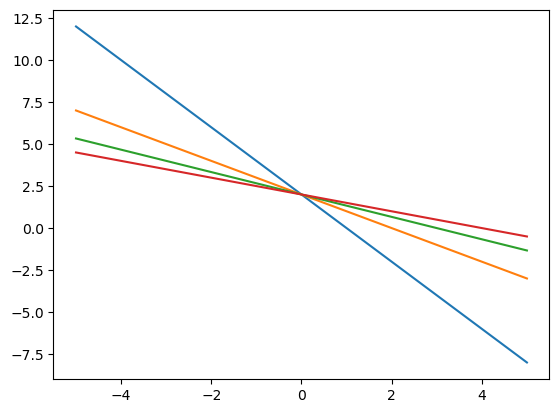

In [9]:
plt.figure()
x = np.linspace(-5,5,10)

for i in range(1, 5):
    m, b = get_m_and_b(i, 2)
    y = m*x + b
    plt.plot(x, y)

In [10]:
a = np.array([[3, 3, 1], [2, 1, -1], [3, 1, 5]], dtype=float)
a[0] = 1/a[0][0] * a[0]
a

array([[ 1.        ,  1.        ,  0.33333333],
       [ 2.        ,  1.        , -1.        ],
       [ 3.        ,  1.        ,  5.        ]])

In [11]:
a[1] = 1/a[1][0] * a[1]
a

array([[ 1.        ,  1.        ,  0.33333333],
       [ 1.        ,  0.5       , -0.5       ],
       [ 3.        ,  1.        ,  5.        ]])

In [12]:
a[2] = 1/a[2][0] * a[2]
a

array([[ 1.        ,  1.        ,  0.33333333],
       [ 1.        ,  0.5       , -0.5       ],
       [ 1.        ,  0.33333333,  1.66666667]])

In [13]:
a[1] = a[0] - a[1]
a[2] = a[0] - a[2]
a

array([[ 1.        ,  1.        ,  0.33333333],
       [ 0.        ,  0.5       ,  0.83333333],
       [ 0.        ,  0.66666667, -1.33333333]])

In [14]:
a = np.array([[9, 3, 4, 7], [4, 3, 4, 8], [1, 1, 1, 3]], dtype=float)
def reduce(a):
    for i in range(len(a)):
        a[i] = 1/a[i][0] * a[i]
        if i > 0:
            a[i] = a[0] - a[i]
    return a

In [15]:
a = reduce(a)

def reduce2(a):
    for i in range(1, len(a)):
        a[i] = 1/a[i][1] * a[i]
        if i > 1:
            a[i] = a[1] - a[i]
    return a

a = reduce2(a)
a

array([[ 1.        ,  0.33333333,  0.44444444,  0.77777778],
       [-0.        ,  1.        ,  1.33333333,  2.93333333],
       [ 0.        ,  0.        ,  0.5       , -0.4       ]])

In [16]:
a = np.array([[9, 3, 4, 7, 2], [4, 3, 4, 8, 12], [1, 1, 1, 3, -7], [2, 4, -6, 1, 9]], dtype=float)
def reduce(a):
    for i in range(len(a)):
        a[i] = 1/a[i][0] * a[i]
        if i > 0:
            a[i] = a[0] - a[i]
    for i in range(1, len(a)-1):
        a[i] = 1/a[i][i+1] * a[i]
        if i > 1:
            a[i] = a[i+1] - a[i]
    return a

#a = reduce(a)
a

array([[ 9.,  3.,  4.,  7.,  2.],
       [ 4.,  3.,  4.,  8., 12.],
       [ 1.,  1.,  1.,  3., -7.],
       [ 2.,  4., -6.,  1.,  9.]])

In [17]:
#get 1 in the top left corner
#get zeroes in the rest of the left column
#move down one row and get zeroes in the second column
#repeat until last row

In [18]:
a = np.array([[9, 3, 4, 7, 2], [4, 3, 4, 8, 12], [1, 1, 1, 3, -7], [2, 4, -6, 1, 9]], dtype=float)

def divide_to_ones(a, row, start_index):
    a[row] = 1/a[row][start_index] * a[row]
    return a

def subtract_rows(a, row1, row2):
    a[row2] = a[row1] - a[row2]

j = 0

for i in range(len(a)):
    divide_to_ones(a, i, 0)

In [19]:
for i in range(1, len(a)):
    subtract_rows(a, 0, i)

In [20]:
a[:, 1:]

array([[ 0.33333333,  0.44444444,  0.77777778,  0.22222222],
       [-0.41666667, -0.55555556, -1.22222222, -2.77777778],
       [-0.66666667, -0.55555556, -2.22222222,  7.22222222],
       [-1.66666667,  3.44444444,  0.27777778, -4.27777778]])

In [21]:
b = np.array([[9, 3, 4, 7, 2], [4, 3, 4, 8, 12], [1, 1, 1, 3, -7], [2, 4, -6, 1, 9]], dtype=float)

In [22]:
for k in range(len(b[0])):
    print(b)
    a = b[k:, :]
    print(a)
    for i in range(len(a)):
        divide_to_ones(a, i, 0)
    for i in range(1, len(a)):
        subtract_rows(a, 0, i)

[[ 9.  3.  4.  7.  2.]
 [ 4.  3.  4.  8. 12.]
 [ 1.  1.  1.  3. -7.]
 [ 2.  4. -6.  1.  9.]]
[[ 9.  3.  4.  7.  2.]
 [ 4.  3.  4.  8. 12.]
 [ 1.  1.  1.  3. -7.]
 [ 2.  4. -6.  1.  9.]]
[[ 1.          0.33333333  0.44444444  0.77777778  0.22222222]
 [ 0.         -0.41666667 -0.55555556 -1.22222222 -2.77777778]
 [ 0.         -0.66666667 -0.55555556 -2.22222222  7.22222222]
 [ 0.         -1.66666667  3.44444444  0.27777778 -4.27777778]]
[[ 0.         -0.41666667 -0.55555556 -1.22222222 -2.77777778]
 [ 0.         -0.66666667 -0.55555556 -2.22222222  7.22222222]
 [ 0.         -1.66666667  3.44444444  0.27777778 -4.27777778]]
[[1.         0.33333333 0.44444444 0.77777778 0.22222222]
 [       nan       -inf       -inf       -inf       -inf]
 [       nan        nan        nan        nan       -inf]
 [       nan        nan       -inf       -inf        nan]]
[[ nan  nan  nan  nan -inf]
 [ nan  nan -inf -inf  nan]]
[[1.         0.33333333 0.44444444 0.77777778 0.22222222]
 [       nan       -inf

C:\Users\Nazia.Habib\AppData\Local\Temp\ipykernel_16504\108303374.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  a[row] = 1/a[row][start_index] * a[row]
C:\Users\Nazia.Habib\AppData\Local\Temp\ipykernel_16504\108303374.py:4: RuntimeWarning: invalid value encountered in multiply
  a[row] = 1/a[row][start_index] * a[row]
C:\Users\Nazia.Habib\AppData\Local\Temp\ipykernel_16504\108303374.py:8: RuntimeWarning: invalid value encountered in subtract
  a[row2] = a[row1] - a[row2]


In [23]:
a = np.zeros((138*87), dtype=bool)
a[np.random.choice(138*87, 1000, replace=False)] = 1 
a = a.reshape(138, 87)

#(a) How many ingredients does a given product contain?

# Choose product 8

a[8, :].sum()

#(b) A given pair of ingredients are used together in how many products?

# Choose ingredients 8 and 10

(a[: , 8] * a[: , 10]).sum()

# (c) How many ingredients do two given products have in common?

# Choose products 8 and 15. For each column, if both values for 8 and 15 are 1, both products contain that ingredient.

(a[8, :] * a[15 , :]).sum()

# (d) In how many products is a given ingredient used?

# Choose ingredient 8

a[:, 8].sum()

3

In [24]:
columns = [f'ingredient_{i}' for i in range(87)]

In [25]:
df = pd.DataFrame(a, columns = columns)

In [26]:
a[8, :].sum()

7

In [27]:
df.loc[8].sum()

7

In [28]:
a[:, 8].sum()

3

In [29]:
df['ingredient_8'].sum()

3

In [30]:
(a[: , 8] & a[: , 10]).sum()

0

In [31]:
(a[8, :] & a[15 , :]).sum()

0

In [32]:
(df.loc[8] & df.loc[10]).sum()

1

In [33]:
#resolve issues

In [40]:
A = np.zeros((5,5))

In [41]:
A[0, :] = [0, df['ingredient_8'], 4**2, 0, 0]

ValueError: setting an array element with a sequence. The requested array would exceed the maximum number of dimension of 1.

In [46]:
a = np.array([3, -1, 1])
b = np.array([2,-1, 2**(1/2)])

In [58]:
def dot_product(a, b):
    return (a * b).sum()

In [59]:
dot_product(a, b)

8.414213562373096

In [ ]:
#change the above to take an unlimited number of arguments

In [ ]:
[1, 3, 5]
[2, 2]

[1, 3, 5, 7, 9, 11]
[2, 2, 2, 2, 2]
[1, 1, 3, 2, 2]
[0, 0, 4, 2, 2]
[0, 0, 5, 1, 1]
[0, 0, 6, 0, 0]
[3, 3, 3, 9, 9, 9]
[4, 3, 3, 8, 9, 9]